# Dataset of simulated windfarms

This dataset contains two wind farms simulated for 4462 different global wind orientation, wind turbulence intensity and mean windspeed. The dataset returns the data as an attributed graph, that contains as node attributes SCADA data, as edge attributes the relative geometric positions of the turbines. If you find the dataset useful in your research, please cite FLORIS and the following publication:

```
@article{mylonas2021relational,
  title={Relational VAE: A Continuous Latent Variable Model for Graph Structured Data},
  author={Mylonas, Charilaos and Abdallah, Imad and Chatzi, Eleni},
  journal={arXiv preprint arXiv:2106.16049},
  year={2021}
}
```

In [1]:
from utils import FLORISFarm
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout

from collections import OrderedDict

import matplotlib.pyplot as pplot
import os
from pathlib import Path
from IPython.display import clear_output
from tqdm import tqdm

In [2]:
dataset = FLORISFarm(adj_cutoff_factor=1000., dataroot = ['SCADA','SimulatedFarm_train_smoothvar'])
dataset_test = FLORISFarm(adj_cutoff_factor=1000., dataroot = ['SCADA','SimulatedFarm_test_smoothvar'])

In [3]:
gt_dict, node_nan_mask, node_static_props, edge_static_props, global_attr = dataset.sample_graphs(10)

(-2000.0, 3500.0)

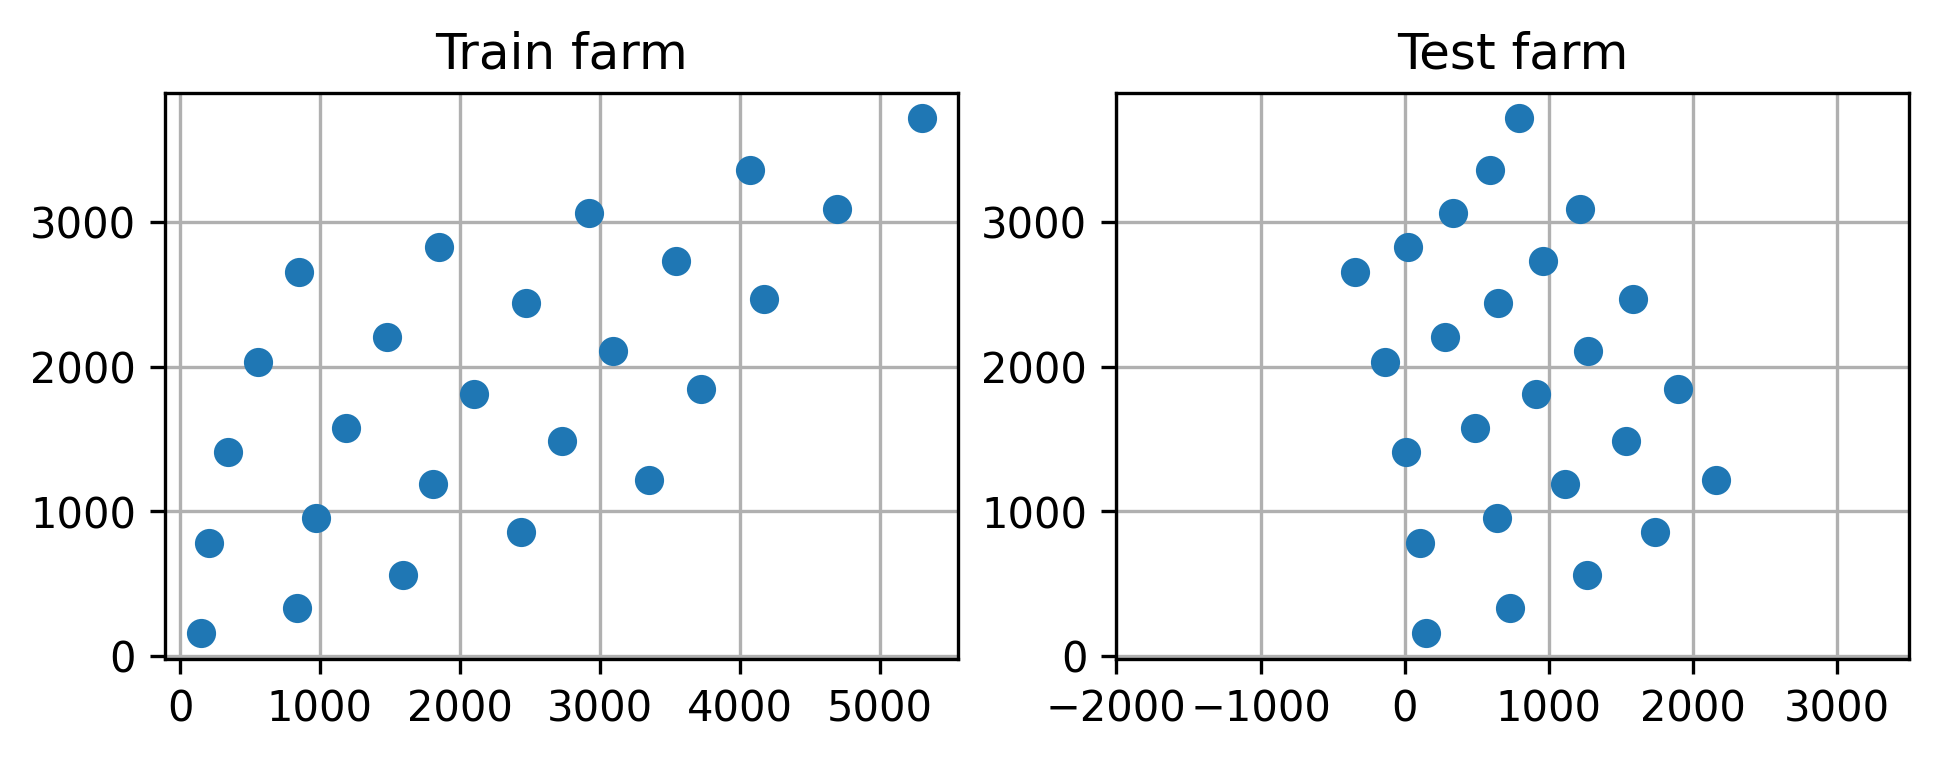

In [4]:
sc = 0.5
fig, ax = pplot.subplots(1,2,figsize=(15*sc,5*sc), dpi = 300)

ax[1].plot(*dataset_test.X.T,'o')
ax[1].set_title("Test farm")
ax[1].grid()

ax[0].plot(*dataset.X.T,'o')
ax[0].grid()
ax[0].set_title("Train farm")
ax[1].set_xlim(-500-1500,5000-1500)


Text(0.5, 1.0, 'Color: windspeed\n Arrows: wind orientation (against inflow)')

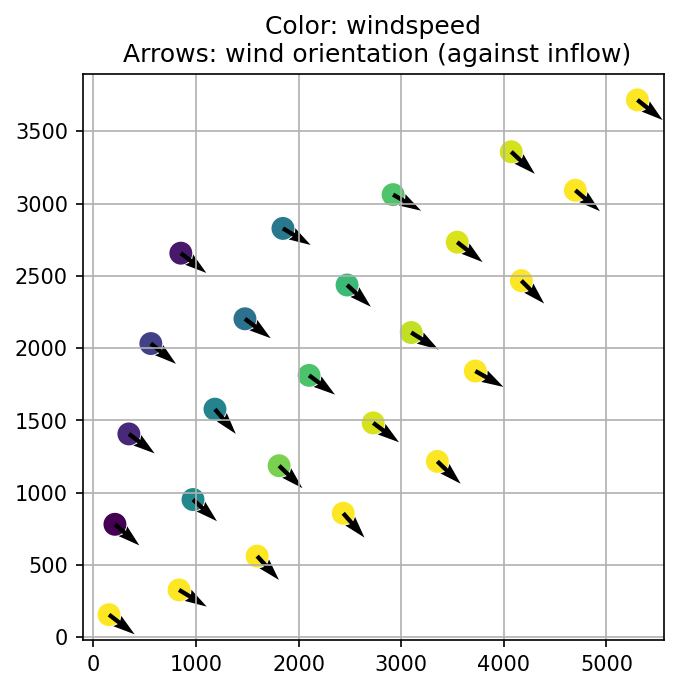

In [5]:
pplot.figure(figsize = (5,5), dpi = 150)
gt, _,_,_,_ = dataset.sample_graphs(1)
cos_yaw = gt['nodes'][:,3]
sin_yaw = gt['nodes'][:,4]
wsp     = gt['nodes'][:,0]
pplot.scatter(dataset.X[:,0], dataset.X[:,1], c = wsp, s= 100)
pplot.quiver(dataset.X[:,0], dataset.X[:,1], sin_yaw, cos_yaw)
pplot.grid()
pplot.title("Color: windspeed\n Arrows: wind orientation (against inflow)")

In [11]:
!du -s SCADA/

8756	SCADA/
